In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.api import qqplot,add_constant
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from statsmodels.tools.eval_measures import rmse
%matplotlib inline
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.model_selection import train_test_split
import matplotlib
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import graphviz
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import warnings
from sklearn.decomposition import PCA
warnings.simplefilter('ignore')
matplotlib.rc('font',family = 'AppleGothic')
matplotlib.rc('axes',unicode_minus=False)
import statsmodels.api as sm

# PCA (주성분) 분석

## (1) 데이터 구성하기

In [45]:
df_raw=pd.read_csv("/Users/lee/Week3/직무능력평가.csv",engine="python",encoding='cp949')
df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,43,51,30,39,61,92,45
1,63,64,51,54,63,73,47
2,71,70,68,69,76,86,48
3,61,63,45,47,54,84,35
4,81,78,56,66,71,83,47


## (2) 데이터 분리하기

In [46]:
df_raw_x=df_raw.drop("EVAL",axis=1)
df_raw_y=df_raw["EVAL"]
df_raw_y.head()
df_raw_x.head()

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,51,30,39,61,92,45
1,64,51,54,63,73,47
2,70,68,69,76,86,48
3,63,45,47,54,84,35
4,78,56,66,71,83,47


## (3) 선형관계 확인

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
DISSATIS,1.000,0.558,0.597,0.669,0.188,0.225
PRIVILEGE,0.558,1.000,0.493,0.445,0.147,0.343
CHANCE,0.597,0.493,1.000,0.640,0.116,0.532
ADVANCE,0.669,0.445,0.640,1.000,0.377,0.574
CRITISM,0.188,0.147,0.116,0.377,1.000,0.283
PROMOTION,0.225,0.343,0.532,0.574,0.283,1.000


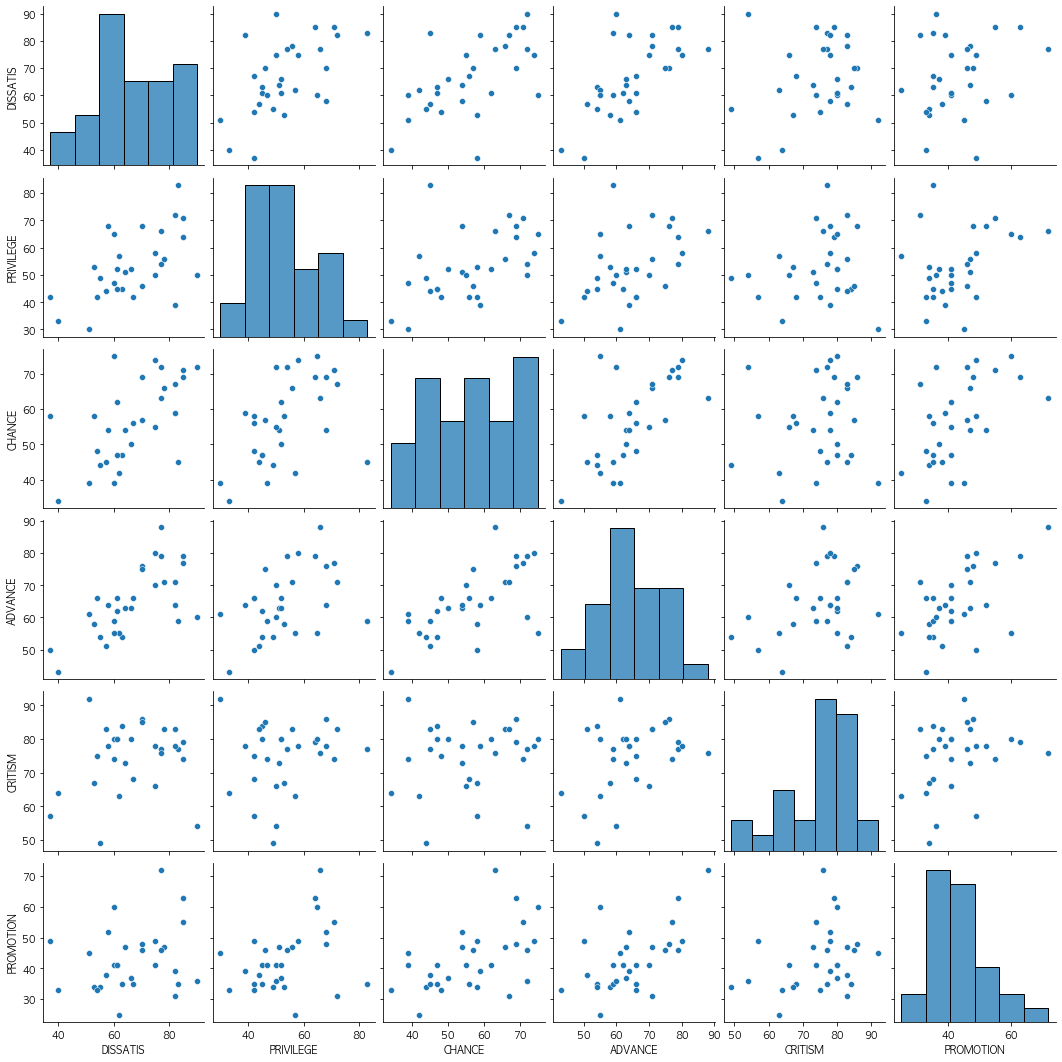

In [47]:
sns.pairplot(df_raw_x)
df_raw_x.corr().round(3)

## (4) 데이터 확인 및 scaling

In [48]:
# 요약 통계량 -> scale 변환 필요 확인
df_raw_x.describe().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
count,30.000,30.000,30.000,30.000,30.000,30.000
mean,66.600,53.133,56.367,64.633,74.767,42.933
std,13.315,12.235,11.737,10.397,9.895,10.289
min,37.000,30.000,34.000,43.000,49.000,25.000
25%,58.500,45.000,47.000,58.250,69.250,35.000
50%,65.000,51.500,56.500,63.500,77.500,41.000
75%,77.000,62.500,66.750,71.000,80.000,47.750
max,90.000,83.000,75.000,88.000,92.000,72.000


In [49]:
x_cols=df_raw_x.columns
scaler=StandardScaler()
nd_scaled=scaler.fit_transform(df_raw_x)
print("Scaled Data:\n{}".format(nd_scaled[:5].round(3)))
print("Shape:\n{}".format(nd_scaled.shape))

Scaled Data:
[[-1.192 -1.923 -1.505 -0.355  1.771  0.204]
 [-0.199 -0.177 -0.205 -0.16  -0.182  0.402]
 [ 0.26   1.236  1.095  1.112  1.155  0.501]
 [-0.275 -0.676 -0.812 -1.04   0.949 -0.784]
 [ 0.871  0.238  0.835  0.623  0.846  0.402]]
Shape:
(30, 6)


In [50]:
# data frame 으로 저장
df_scaled = pd.DataFrame(nd_scaled,columns=x_cols)
df_scaled.head().round(3)
df_scaled.describe().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
count,30.000,30.000,30.000,30.000,30.000,30.000
mean,0.000,-0.000,-0.000,-0.000,0.000,0.000
std,1.017,1.017,1.017,1.017,1.017,1.017
min,-2.261,-1.923,-1.938,-2.116,-2.649,-1.773
25%,-0.619,-0.676,-0.812,-0.624,-0.567,-0.784
50%,-0.122,-0.136,0.012,-0.111,0.281,-0.191
75%,0.794,0.779,0.900,0.623,0.538,0.476
max,1.787,2.483,1.615,2.286,1.771,2.873


## (5) 주성분 분석

In [51]:
pca = PCA(n_components=6)
nd_pca=pca.fit_transform(df_scaled)
print("PCA DATA:\n{}".format(nd_pca[:5]))
print("Shape:\n{}".format(nd_pca.shape))

PCA DATA:
[[ 1.67606983 -2.73856419 -0.12843595 -0.50321261  0.24330658  0.22576117]
 [ 0.21834397 -0.12615302  0.43115839  0.08726221  0.19566103  0.1941439 ]
 [-2.10515127 -0.51500683 -0.27683087  0.49131136 -0.44691698 -0.63174369]
 [ 1.35994032 -0.86064574 -0.91799066  0.03173793 -0.40137177  0.44095403]
 [-1.5120347  -0.35277019 -0.32684445 -0.32877858 -0.32709718  0.21246099]]
Shape:
(30, 6)


## (6) 주성분 분석 결과

In [52]:
#주 성분 점수
df_pca=pd.DataFrame(nd_pca,columns=["prin1","prin2","prin3","prin4","prin5","prin6"])
df_scaled_pca=df_scaled.join(df_pca)
df_scaled_pca.head()

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,prin1,prin2,prin3,prin4,prin5,prin6
0,-1.191662,-1.923006,-1.504945,-0.355426,1.771410,0.204301,1.676070,-2.738564,-0.128436,-0.503213,0.243307,0.225761
1,-0.198610,-0.177338,-0.205088,-0.159779,-0.181595,0.402012,0.218344,-0.126153,0.431158,0.087262,0.195661,0.194144
2,0.259721,1.235822,1.094768,1.111930,1.154672,0.500868,-2.105151,-0.515007,-0.276831,0.491311,-0.446917,-0.631744
3,-0.274999,-0.676100,-0.811688,-1.040192,0.949092,-0.784254,1.359940,-0.860646,-0.917991,0.031738,-0.401372,0.440954
4,0.870830,0.238298,0.834797,0.622811,0.846302,0.402012,-1.512035,-0.352770,-0.326844,-0.328779,-0.327097,0.212461


## (7) 주성분 분석 및 결과 : 고유값 확인 및 주성분 개수 결정

In [53]:
# 주성분 분석 통계량 저장
df_pca_stat=pd.DataFrame()
df_pca_stat["PrinNo"]=[i for i in range(1,7)]
df_pca_stat["EigenValues"]=pca.explained_variance_
df_pca_stat["EigenValueRatio"]=pca.explained_variance_ratio_
df_pca_stat["CumEigenValueRatio"]=np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3)

,PrinNo,EigenValues,EigenValueRatio,CumEigenValueRatio
0,1,3.279,0.528,0.528
1,2,1.041,0.168,0.696
2,3,0.789,0.127,0.823
3,4,0.572,0.092,0.915
4,5,0.328,0.053,0.968
5,6,0.198,0.032,1.000


## (8) 주성분 분석 및 결과 : Scree Plot 확인 및 주성분 개수 결정

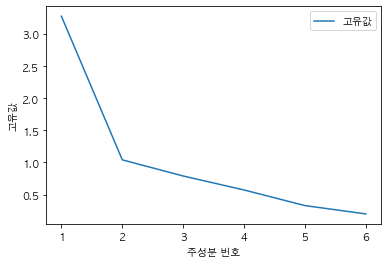

In [54]:
# Scree plot
plt.plot(df_pca_stat["PrinNo"],df_pca_stat["EigenValues"],label="고유값")
plt.ylabel("고유값")
plt.xlabel("주성분 번호")
plt.legend(loc="best")

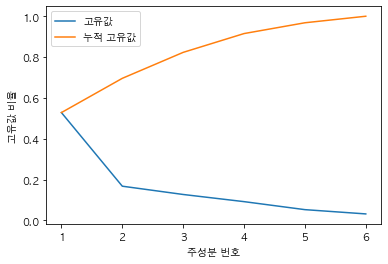

In [55]:
plt.plot(df_pca_stat["PrinNo"],df_pca_stat["EigenValueRatio"],label="고유값")

plt.plot(df_pca_stat["PrinNo"],df_pca_stat["CumEigenValueRatio"],label="누적 고유값")
plt.ylabel("고유값 비율")
plt.xlabel("주성분 번호")
plt.legend(loc="best")

## (9) 주성분 분석 및 결과 : 고유 벡터 확인 및 해석

In [56]:
x_cols=pd.DataFrame({"Feature":df_raw_x.columns})

df_eigenvector=pd.concat([x_cols,pd.DataFrame(pca.components_.T*-1,columns=["Prin1","Prin2","Prin3","Prin4","Prin5","Prin6"])],axis=1)
df_eigenvector.round(3)

,Feature,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
0,DISSATIS,0.439,-0.313,0.445,0.316,-0.192,-0.612
1,PRIVILEGE,0.395,-0.309,0.217,-0.815,-0.038,0.190
2,CHANCE,0.461,-0.217,-0.272,0.225,0.776,0.118
3,ADVANCE,0.493,0.116,0.006,0.365,-0.460,0.631
4,CRITISM,0.225,0.802,0.457,-0.100,0.289,-0.058
5,PROMOTION,0.381,0.321,-0.687,-0.206,-0.255,-0.416


## (10) 주성분 상관/회귀분석 : 상관관계

,prin1,prin2,prin3,prin4,prin5,prin6
prin1,1.0,0.0,-0.0,-0.0,0.0,0.0
prin2,0.0,1.0,0.0,0.0,0.0,-0.0
prin3,-0.0,0.0,1.0,0.0,0.0,0.0
prin4,-0.0,0.0,0.0,1.0,0.0,0.0
prin5,0.0,0.0,0.0,0.0,1.0,0.0
prin6,0.0,-0.0,0.0,0.0,0.0,1.0


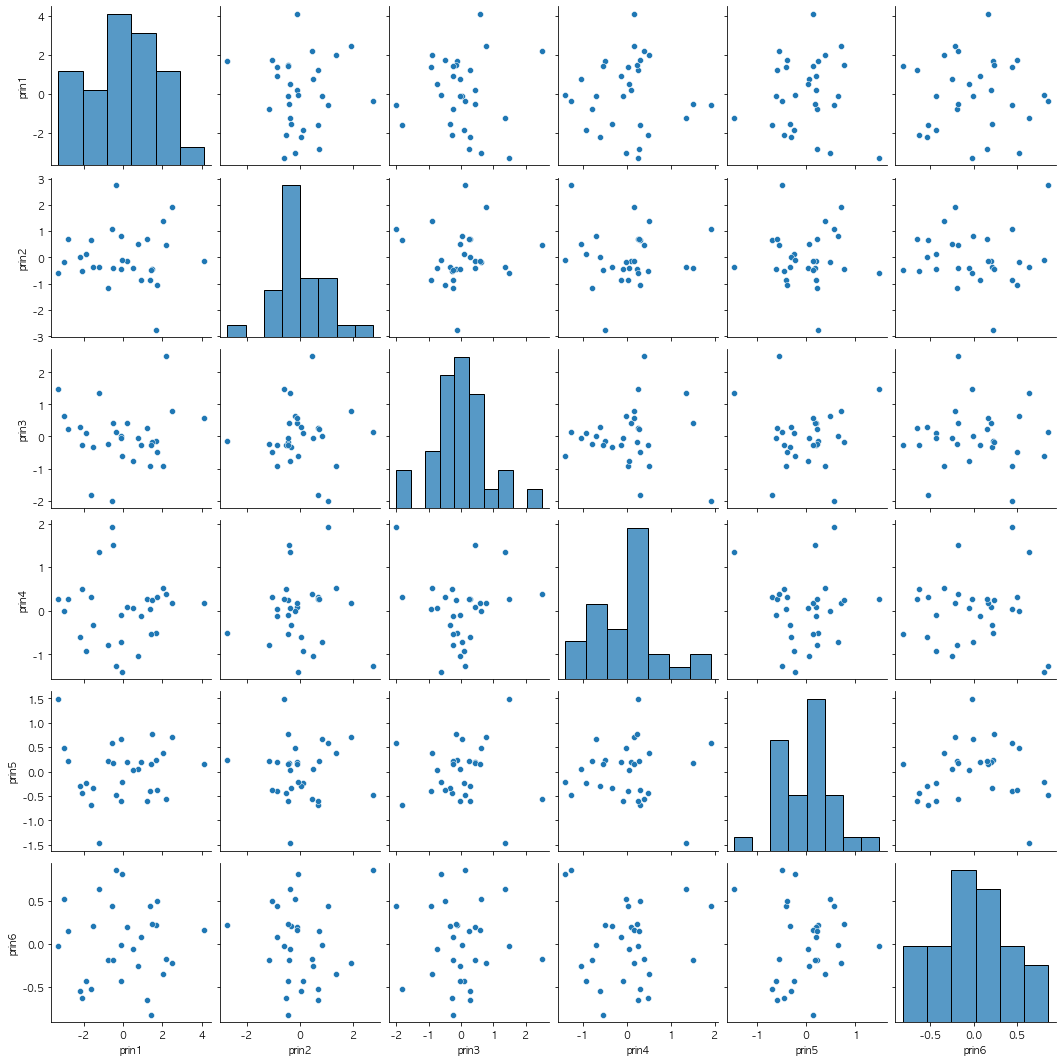

In [57]:
sns.pairplot(df_pca)
df_pca.corr().round(3)

## (11) 주성분 상관/회귀분석 : 상관관계

In [67]:
#다중 선형 회귀분석:원천 데이터 활용
# 원천데이터에 절편추가

df_raw_x_const=sm.add_constant(df_raw_x)
reg_model=sm.OLS(df_raw_y,df_raw_x_const)
reg_model=reg_model.fit()
print(reg_model.summary())

#다중 선형 회귀분석 :scale 데이터 이용
df_scaled_const=sm.add_constant(df_scaled)
reg_model=sm.OLS(df_raw_y,df_scaled_const)
reg_model=reg_model.fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     10.50
Date:                Wed, 19 May 2021   Prob (F-statistic):           1.24e-05
Time:                        15:50:15   Log-Likelihood:                -97.250
No. Observations:                  30   AIC:                             208.5
Df Residuals:                      23   BIC:                             218.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.7871     11.589      0.931      0.3

In [66]:
# 다중 선형 주성분 회귀분석 : 주성분 점수 데이터 활용
# 아이젠 벨류,스크리 플랏 기준으로 주성분 선택
x_var=["prin1","prin2","prin3"]
df_pca_const=sm.add_constant(df_pca[x_var])
reg_model=sm.OLS(df_raw_y,df_pca_const)
reg_model=reg_model.fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     14.36
Date:                Wed, 19 May 2021   Prob (F-statistic):           1.02e-05
Time:                        15:49:46   Log-Likelihood:                -102.38
No. Observations:                  30   AIC:                             212.8
Df Residuals:                      26   BIC:                             218.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.6333      1.440     44.890      0.0